### Carzam (CompCars)
Trying to do transfer learning on the Vgg16 model for predicting car make/model using the CompCars dataset.

In [1]:
import os
import glob

import keras
from keras.preprocessing import image

from matplotlib import pyplot as plt
import numpy as np
from numpy.random import permutation
np.set_printoptions(precision=4, linewidth=100)
from sklearn.cross_validation import train_test_split
import skimage
from skimage import data, color, exposure

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Contains some utilty functions
# TODO Figure out what "reload" does
import utils; reload(utils)
from utils import plots
# Contains the trained Vgg16 model (2014 winner of ImageNet)
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [3]:
path = "../data/compcars/data/image/"
model_path = path + 'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

In [4]:
# For showing the plots in this webpage
%matplotlib inline

In [5]:
# If running out of memory or using an older GPU, decrease this number
batch_size = 32

In [6]:
vgg = Vgg16()

In [7]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 14673 images belonging to 1343 classes.
Found 1343 images belonging to 1343 classes.


In [8]:
imgs, labels = next(batches)

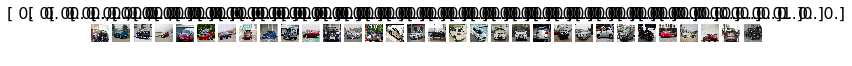

In [9]:
plots(imgs, titles=labels)

In [10]:
vgg.finetune(batches)

In [12]:
# Plot the results of the training
def plot_results(history):
    # Summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/10
14673/14673 [==============================] - 419s - loss: 10.6081 - acc: 0.0356 - val_loss: 8.8518 - val_acc: 0.0998
Epoch 2/10
14673/14673 [==============================] - 420s - loss: 7.7562 - acc: 0.1725 - val_loss: 8.5428 - val_acc: 0.1459
Epoch 3/10
14673/14673 [==============================] - 419s - loss: 6.4999 - acc: 0.2720 - val_loss: 8.4329 - val_acc: 0.1601
Epoch 4/10
14673/14673 [==============================] - 419s - loss: 5.7054 - acc: 0.3391 - val_loss: 8.0287 - val_acc: 0.1943
Epoch 5/10
14673/14673 [==============================] - 419s - loss: 5.1545 - acc: 0.3947 - val_loss: 7.9925 - val_acc: 0.2107
Epoch 6/10
14673/14673 [==============================] - 419s - loss: 4.7943 - acc: 0.4296 - val_loss: 8.1199 - val_acc: 0.2197
Epoch 7/10
14673/14673 [==============================] - 419s - loss: 4.4279 - acc: 0.4708 - val_loss: 8.1110 - val_acc: 0.2249
Epoch 8/10
14673/14673 [==============================] - 419s - loss: 4.1511 - acc: 0.4959 - va

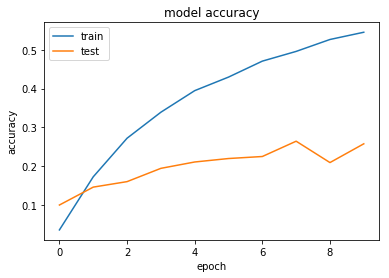

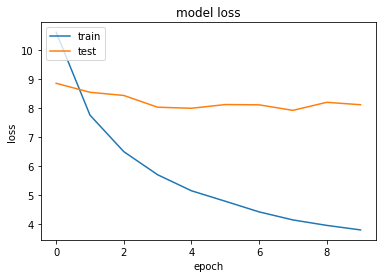

In [13]:
history = vgg.fit(batches, val_batches, nb_epoch=10)
plot_results(history)
vgg.model.save_weights(model_path+'compcars_finetune_10_epochs.h5')

Epoch 1/10
14673/14673 [==============================] - 420s - loss: 3.6727 - acc: 0.5600 - val_loss: 8.3042 - val_acc: 0.2420
Epoch 2/10
14673/14673 [==============================] - 419s - loss: 3.5557 - acc: 0.5760 - val_loss: 8.1818 - val_acc: 0.2554
Epoch 3/10
14673/14673 [==============================] - 420s - loss: 3.4332 - acc: 0.5907 - val_loss: 8.4410 - val_acc: 0.2547
Epoch 4/10
14673/14673 [==============================] - 419s - loss: 3.3989 - acc: 0.5957 - val_loss: 8.5353 - val_acc: 0.2442
Epoch 5/10
14673/14673 [==============================] - 419s - loss: 3.2222 - acc: 0.6195 - val_loss: 8.3067 - val_acc: 0.2785
Epoch 6/10
14673/14673 [==============================] - 419s - loss: 3.1764 - acc: 0.6183 - val_loss: 8.3255 - val_acc: 0.2606
Epoch 7/10
14673/14673 [==============================] - 420s - loss: 3.0843 - acc: 0.6350 - val_loss: 8.3839 - val_acc: 0.2658
Epoch 8/10
14673/14673 [==============================] - 419s - loss: 3.0232 - acc: 0.6455 - val

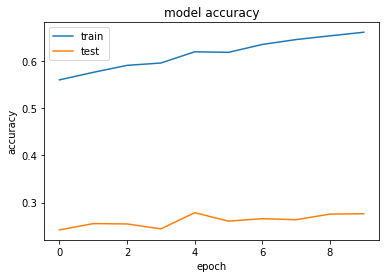

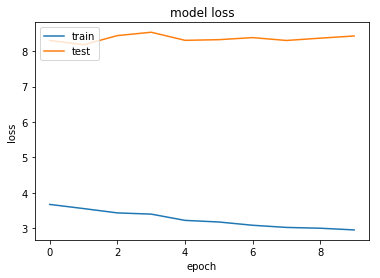

In [14]:
history = vgg.fit(batches, val_batches, nb_epoch=10)
plot_results(history)
vgg.model.save_weights(model_path+'compcars_finetune_20_epochs.h5')

Epoch 1/10
14673/14673 [==============================] - 420s - loss: 2.9262 - acc: 0.6649 - val_loss: 8.5927 - val_acc: 0.2614
Epoch 2/10
14673/14673 [==============================] - 420s - loss: 2.8483 - acc: 0.6721 - val_loss: 8.5457 - val_acc: 0.2688
Epoch 3/10
14673/14673 [==============================] - 419s - loss: 2.8335 - acc: 0.6734 - val_loss: 8.3339 - val_acc: 0.2986
Epoch 4/10
14673/14673 [==============================] - 419s - loss: 2.7420 - acc: 0.6872 - val_loss: 8.2728 - val_acc: 0.2889
Epoch 5/10
14673/14673 [==============================] - 419s - loss: 2.7936 - acc: 0.6874 - val_loss: 8.3699 - val_acc: 0.2844
Epoch 6/10
14673/14673 [==============================] - 419s - loss: 2.6926 - acc: 0.6950 - val_loss: 8.6302 - val_acc: 0.2904
Epoch 7/10
14673/14673 [==============================] - 419s - loss: 2.7376 - acc: 0.6949 - val_loss: 8.4190 - val_acc: 0.2949
Epoch 8/10
14673/14673 [==============================] - 419s - loss: 2.6961 - acc: 0.7004 - val

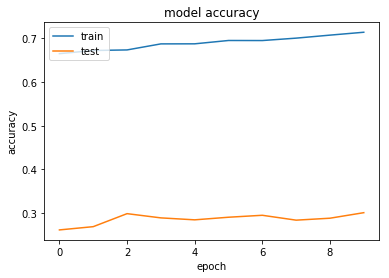

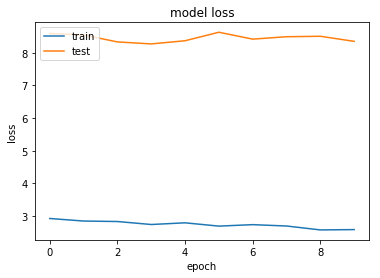

In [15]:
history = vgg.fit(batches, val_batches, nb_epoch=10)
plot_results(history)
vgg.model.save_weights(model_path+'compcars_finetune_30_epochs.h5')

Epoch 1/10
14673/14673 [==============================] - 420s - loss: 2.5608 - acc: 0.7186 - val_loss: 8.6181 - val_acc: 0.2911
Epoch 2/10
14673/14673 [==============================] - 419s - loss: 2.5905 - acc: 0.7150 - val_loss: 8.2041 - val_acc: 0.3023
Epoch 3/10
14673/14673 [==============================] - 419s - loss: 2.5147 - acc: 0.7215 - val_loss: 8.4017 - val_acc: 0.3016
Epoch 4/10
14673/14673 [==============================] - 419s - loss: 2.5282 - acc: 0.7247 - val_loss: 8.4399 - val_acc: 0.3120
Epoch 5/10
14673/14673 [==============================] - 419s - loss: 2.4305 - acc: 0.7345 - val_loss: 8.7515 - val_acc: 0.2986
Epoch 6/10
14673/14673 [==============================] - 420s - loss: 2.4663 - acc: 0.7323 - val_loss: 8.7369 - val_acc: 0.2897
Epoch 7/10
14673/14673 [==============================] - 419s - loss: 2.4787 - acc: 0.7308 - val_loss: 8.3251 - val_acc: 0.2993
Epoch 8/10
14673/14673 [==============================] - 419s - loss: 2.4454 - acc: 0.7344 - val

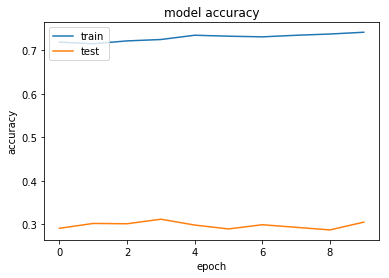

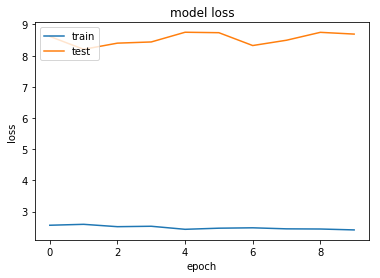

In [16]:
history = vgg.fit(batches, val_batches, nb_epoch=10)
plot_results(history)
vgg.model.save_weights(model_path+'compcars_finetune_40_epochs.h5')

Epoch 1/10
14673/14673 [==============================] - 420s - loss: 2.4073 - acc: 0.7482 - val_loss: 8.6023 - val_acc: 0.3105
Epoch 2/10
14673/14673 [==============================] - 419s - loss: 2.3369 - acc: 0.7477 - val_loss: 8.7239 - val_acc: 0.2986
Epoch 3/10
14673/14673 [==============================] - 419s - loss: 2.3914 - acc: 0.7460 - val_loss: 8.8061 - val_acc: 0.2941
Epoch 4/10
14673/14673 [==============================] - 420s - loss: 2.3492 - acc: 0.7504 - val_loss: 8.6586 - val_acc: 0.3112
Epoch 5/10
14673/14673 [==============================] - 419s - loss: 2.3356 - acc: 0.7523 - val_loss: 8.6259 - val_acc: 0.3187
Epoch 6/10
14673/14673 [==============================] - 420s - loss: 2.3407 - acc: 0.7534 - val_loss: 8.7478 - val_acc: 0.3045
Epoch 7/10
14673/14673 [==============================] - 420s - loss: 2.3073 - acc: 0.7598 - val_loss: 8.8049 - val_acc: 0.3016
Epoch 8/10
14673/14673 [==============================] - 420s - loss: 2.3046 - acc: 0.7585 - val

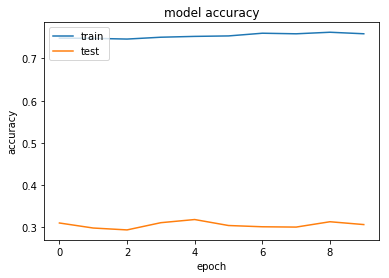

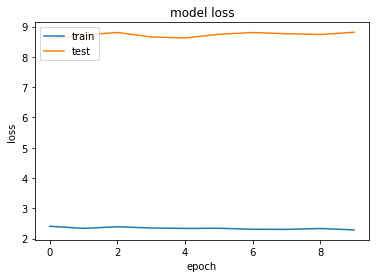

In [17]:
history = vgg.fit(batches, val_batches, nb_epoch=10)
plot_results(history)
vgg.model.save_weights(model_path+'compcars_finetune_50_epochs.h5')

Epoch 1/30
14673/14673 [==============================] - 420s - loss: 2.3115 - acc: 0.7581 - val_loss: 8.8811 - val_acc: 0.2941
Epoch 2/30
14673/14673 [==============================] - 419s - loss: 2.2646 - acc: 0.7672 - val_loss: 8.7009 - val_acc: 0.2993
Epoch 3/30
14673/14673 [==============================] - 421s - loss: 2.2967 - acc: 0.7639 - val_loss: 8.9132 - val_acc: 0.3023
Epoch 4/30
14673/14673 [==============================] - 419s - loss: 2.2274 - acc: 0.7690 - val_loss: 8.8124 - val_acc: 0.3142
Epoch 5/30
14673/14673 [==============================] - 419s - loss: 2.1768 - acc: 0.7752 - val_loss: 8.6931 - val_acc: 0.3068
Epoch 6/30
14673/14673 [==============================] - 420s - loss: 2.2133 - acc: 0.7741 - val_loss: 8.7507 - val_acc: 0.3075
Epoch 7/30
14673/14673 [==============================] - 419s - loss: 2.2566 - acc: 0.7677 - val_loss: 8.7560 - val_acc: 0.3120
Epoch 8/30
14673/14673 [==============================] - 419s - loss: 2.2137 - acc: 0.7715 - val

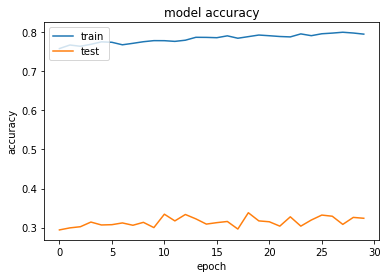

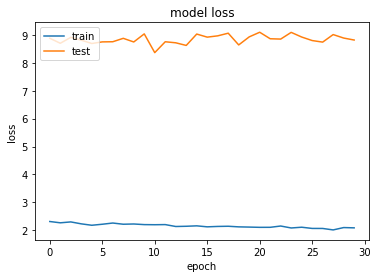

In [ ]:
history = vgg.fit(batches, val_batches, nb_epoch=30)
plot_results(history)
vgg.model.save_weights(model_path+'compcars_finetune_80_epochs.h5')

In [9]:
vgg.model.load_weights(model_path+'compcars_finetune_80_epochs.h5')

In [ ]:
history = vgg.fit(batches, val_batches, nb_epoch=30)
plot_results(history)
vgg.model.save_weights(model_path+'compcars_finetune_110_epochs.h5')

In [ ]:
history = vgg.fit(batches, val_batches, nb_epoch=40)
plot_results(history)
vgg.model.save_weights(model_path+'compcars_finetune_150_epochs.h5')

Epoch 1/40
 3680/14673 [======>.......................] - ETA: 289s - loss: 1.8893 - acc: 0.8280

In [ ]:
history = vgg.fit(batches, val_batches, nb_epoch=50)
plot_results(history)
vgg.model.save_weights(model_path+'compcars_finetune_200_epochs.h5')

In [ ]:
history = vgg.fit(batches, val_batches, nb_epoch=50)
plot_results(history)
vgg.model.save_weights(model_path+'compcars_finetune_250_epochs.h5')

In [39]:
vgg.model.load_weights(model_path+'compcars_finetune_200_epochs.h5')

In [40]:
vgg.predict(imgs, True)

(array([ 1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  0.9724,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  0.9191,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         0.9991,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  0.9945,  1.    ,  1.    ,
         1.    ,  1.    ], dtype=float32),
 array([ 818,  868, 1304,  511,  784,  520, 1168,  666, 1225, 1085,   41,  907,  597,  642,  746,
          94,  931,  294, 1304,  458,  496,  893,  652, 1232,  324,  180,  532,  601,  934, 1342,
        1320,  100]),
 ['53_763_2011',
  '54_197_2010',
  '95_917_2013',
  '158_1251_2008',
  '48_317_2012',
  '158_1255_2012',
  '78_3_2009',
  '28_1885_2013',
  '81_68_2013',
  '77_132_2009',
  '102_261_2014',
  '69_1509_2010',
  '160_792_2013',
  '26_1692_2015',
  '39_1330_2010',
  '105_304_2011',
  '73_439_2013',
  '131_1015_2013',
  '95_917_2013',
  '152_409_2010',
  '157_1913_2014',
  '69_1483_2010',
  '28_1866_2010',
  '81_70_2010',
  '134_661_2014',
  '11

In [41]:
test_batches, probs = vgg.test(path+'test', batch_size=batch_size)
labels = test_batches.classes
filenames = test_batches.filenames

Found 14939 images belonging to 1339 classes.


In [42]:
labels_predicted = [np.argmax(prob) for prob in probs]

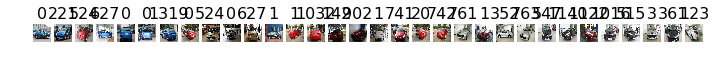

In [31]:
test_imgs = next(test_batches)
plots(test_imgs, titles=labels_predicted)

In [17]:
labels_predicted

[0,
 221,
 0,
 201,
 0,
 0,
 1319,
 0,
 919,
 0,
 627,
 1,
 1,
 638,
 899,
 1,
 1,
 741,
 20,
 1,
 761,
 1,
 969,
 1162,
 1140,
 1140,
 1122,
 58,
 809,
 3,
 809,
 834,
 834,
 418,
 4,
 443,
 480,
 531,
 544,
 1206,
 8,
 1091,
 280,
 4,
 601,
 4,
 212,
 1250,
 805,
 1298,
 5,
 146,
 904,
 256,
 537,
 99,
 740,
 6,
 533,
 265,
 587,
 540,
 1131,
 1233,
 205,
 896,
 1153,
 7,
 210,
 7,
 1112,
 1060,
 483,
 7,
 483,
 1168,
 358,
 7,
 691,
 457,
 826,
 995,
 761,
 1129,
 8,
 8,
 9,
 561,
 658,
 210,
 456,
 8,
 9,
 707,
 8,
 826,
 8,
 8,
 1117,
 9,
 762,
 8,
 8,
 627,
 9,
 9,
 919,
 9,
 931,
 9,
 136,
 196,
 9,
 802,
 9,
 9,
 277,
 21,
 205,
 750,
 167,
 465,
 762,
 401,
 616,
 558,
 968,
 10,
 40,
 15,
 1060,
 10,
 10,
 343,
 1203,
 146,
 11,
 314,
 146,
 11,
 628,
 1010,
 1061,
 1319,
 476,
 11,
 48,
 146,
 63,
 616,
 1007,
 12,
 249,
 1263,
 1010,
 395,
 996,
 14,
 945,
 1058,
 1035,
 14,
 135,
 312,
 312,
 14,
 11,
 746,
 1022,
 1267,
 465,
 629,
 15,
 935,
 15,
 170,
 15,
 834,
 205,
 

In [43]:
classes = [vgg.classes[idx] for idx in labels_predicted]

In [18]:
filenames

['100_211_2011/0c55734d1a96ac.jpg',
 '100_211_2011/862f8230c798e1.jpg',
 '100_211_2011/22ff15ed203313.jpg',
 '100_211_2011/d3ad0faf6e29a6.jpg',
 '100_211_2011/1b1cd08562462e.jpg',
 '100_211_2011/8e90731c1c6d3f.jpg',
 '100_211_2011/97f7edb2a1ea4c.jpg',
 '100_211_2011/a92281c217a201.jpg',
 '100_211_2011/c6691697c92669.jpg',
 '100_211_2011/4f8770942ba4d7.jpg',
 '100_211_2011/2a5b0f68e87ade.jpg',
 '100_211_2012/b294f935712384.jpg',
 '100_211_2012/718ac24fdeb0b1.jpg',
 '100_211_2012/5f70725002499e.jpg',
 '100_211_2012/b0202281d724a1.jpg',
 '100_211_2012/8f124cedd64d80.jpg',
 '100_211_2012/e93c3979bee3f8.jpg',
 '100_211_2012/cea79cfc5a6ae1.jpg',
 '100_211_2012/df87f906005fe8.jpg',
 '100_211_2012/4e715f4c659829.jpg',
 '100_211_2012/66a41c05d6a519.jpg',
 '100_211_2012/d9dbddadacdada.jpg',
 '100_211_2012/656456ce8d8ec4.jpg',
 '100_211_2012/2b837132e9f47b.jpg',
 '100_211_2013/f12e1276172293.jpg',
 '100_211_2013/59ca3d629b3fab.jpg',
 '100_211_2013/b0a867771101d0.jpg',
 '100_211_2013/11133bc3fbd72

In [25]:
def check_count_correct(filenames, classes):
    assert(len(filenames) == len(classes))
    correct = incorrect = 0
    for i in range(len(filenames)):
        if filenames[i].split('/')[0] == classes[i]:
            correct += 1
        else:
            incorrect += 1
    return correct, incorrect

In [44]:
correct, incorrect = check_count_correct(filenames, classes)
print correct
print incorrect

5604
9335


In [19]:
batches.classes

array([   0,    0,    0, ..., 1342, 1342, 1342], dtype=int32)

In [ ]:
def plots_idx(idx, titles=None):
    """Helper function for plotting images by index in the validation set."""
    if len(idx) > 0:
        plots([image.load_img(path+'valid/'+filenames[i]) for i in idx], titles=titles)
    else:
        print "Nothing to plot!"